In [1]:
#Portfolio optimization using Monte carlo Simulation



In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt



In [27]:
# Step 1: Download historical price data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download(tickers, start='2020-01-01', auto_adjust=True)
#adj_close = data['Adj Close'] #This did nto work. auto_adjust=True worked. 

#data = yf.download(tickers, start="2020-01-01")['Adj Close'] Thsi did nto work either.




#MultiIndex([('Adj Close', 'AAPL'),
            #('Adj Close', 'MSFT'),
           #('Adj Close', 'GOOGL'),
            #('Adj Close', 'AMZN')],
           #names=['Attributes', 'Ticker'])


[*********************100%***********************]  4 of 4 completed


In [28]:
# Step 2: Calculate daily returns and annualized stats
returns = data.pct_change().dropna()
mean_returns = returns.mean().values * 252
cov_matrix = returns.cov().values * 252


In [29]:

# Step 3: Monte Carlo simulation
num_portfolios = 10000
num_assets = len(data.columns) # Use actual columns count
results = []

for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (port_return - 0.02) / port_volatility  # risk-free rate = 2%

    results.append([port_return, port_volatility, sharpe_ratio, *weights])


In [30]:
#Test

#print(len(weights))
#print(len(mean_returns))
#print (len(cov_matrix))


20
20
20


In [40]:
# Step 4: Convert to DataFrame
column_names = ['Return', 'Volatility', 'Sharpe'] + list(data.columns)
results_df = pd.DataFrame(results, columns=column_names)

# Step 5: Identify optimal portfolio
optimal = results_df.loc[results_df['Sharpe'].idxmax()]


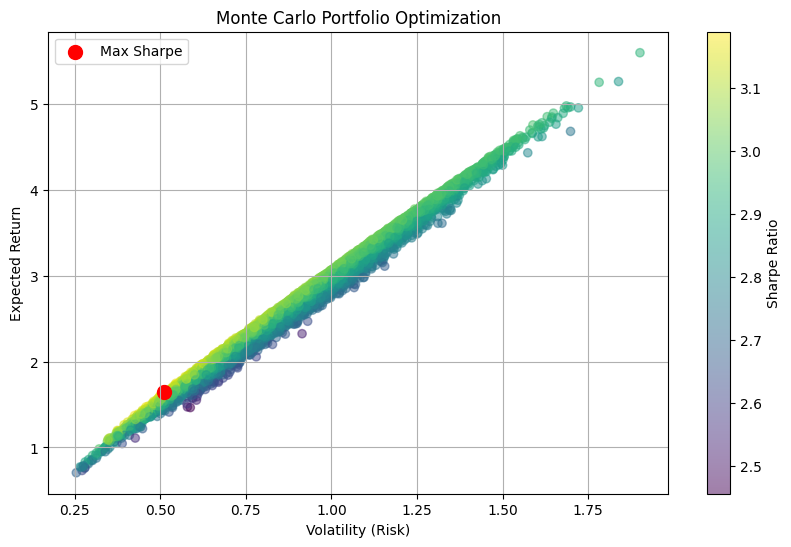

In [41]:
# Step 6: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal['Volatility'], optimal['Return'], c='red', s=100, label='Max Sharpe')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Monte Carlo Portfolio Optimization')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Red dot is teh  optimal portfolio